## Observation & Insights

1.) Drugs "Capomulin" and "Ramicane" has got lower mean(avg),std,stderr compared to the other 8 drug regimens.We can infer that these two drug regimens are the most successful drugs in reducing tumor volume in mice over 45 days.This inference is also based on the line chart where we compare Timepoint versus Tumor volume.If we are to change this drugs used for the line graph,we can see that  only Capomulin and Ramicane decrease in volume while all the rest of the mice's tumors on other drug regimens, increase in volume. We can also see this by the boxplot showing the final tumor volume

2.) From the scatter plot comparing tumor volume and weight, the graph shows that the greater the weight of the mice, the greater the tumor volume. The pvalue(0.84) is very large which means we should accept the null hypothesis.The weight of the mice and the tumor volume are not correlated and only seem to be correlated by chance. This could be because the weight of the tumor also increases the overwall weight of the mice

3.) The total amount of measurements taken don't seem to affect which drugs preform better. As you can see from the bar graphs, which show the total measurements, and the summary tables, the regimens with the most measurements (Ketapril) don't have lower stderr. Normally the more measurements mean more accurate the data. The stderr was the lowest for the Capomulin and Ramicane regimens further highlighting the reliability of both the regimens.

In [229]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path ="C:/Users/sreev/OneDrive/Desktop/Mouse_data.csv"
study_results_path ="C:/Users/sreev/OneDrive/Desktop/Study_results.csv"


In [134]:

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [135]:
# Combine the data into a single dataset
combined_df=pd.merge(study_results,mouse_metadata,how='inner',on="Mouse ID")

In [136]:
# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [137]:
# Checking the number of mice.
total_mice=len(combined_df['Mouse ID'].value_counts())
total_mice_df=pd.DataFrame({'Total number of mice':total_mice},index=[0])
total_mice_df

,Total number of mice
0,249


In [138]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id=combined_df.loc[combined_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [139]:
# Optional: Get all the data for the duplicate mouse ID - 'g989'
duplicate_id_data=combined_df.loc[combined_df["Mouse ID"]=='g989']
duplicate_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [140]:
# Checking the number of mice.
total_mice=len(combined_df["Mouse ID"].value_counts())
total_mice_df=pd.DataFrame({"Total number of mice":total_mice},index=[0])
total_mice_df

,Total number of mice
0,249


In [141]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id=combined_df.loc[combined_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_id
                          

array(['g989'], dtype=object)

In [142]:
# Optional: Get all the data for the duplicate mouse ID - 'g989'
duplicate_id_data=combined_df.loc[combined_df["Mouse ID"]=='g989']
duplicate_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [143]:
clean_df=combined_df.loc[combined_df["Mouse ID"]!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [144]:
total_clean_mice=len(clean_df["Mouse ID"].value_counts())
total_clean_df=pd.DataFrame({"Total number of mice post cleanup":total_clean_mice},index=[0])
total_clean_df

,Total number of mice post cleanup
0,248


In [145]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [146]:

## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_reg=clean_df.groupby("Drug Regimen")
drug_sum=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()
drug_mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().round(3)
drug_median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().round(3)
drug_std=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().round(3)
drug_var=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().round(3)
drug_sem=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().round(3)
drug_summary=pd.DataFrame({"Mean":drug_mean,"Median":drug_median,"Std":drug_std,"Var":drug_var,"Sem":drug_sem})
drug_summary

,Mean,Median,Std,Var,Sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,4.995,24.948,0.329
Ceftamin,52.591,51.776,6.268,39.290,0.470
Infubinol,52.885,51.821,6.567,43.129,0.492
Ketapril,55.236,53.699,8.280,68.554,0.604
Naftisol,54.332,52.509,8.135,66.173,0.596
Placebo,54.034,52.289,7.821,61.168,0.581
Propriva,52.321,50.446,6.622,43.852,0.544
Ramicane,40.217,40.673,4.846,23.487,0.321
Stelasyn,54.233,52.432,7.710,59.451,0.573


In [147]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_reg_clean_df=clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})
drug_reg_clean_df

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar & Pie Charts

In [148]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


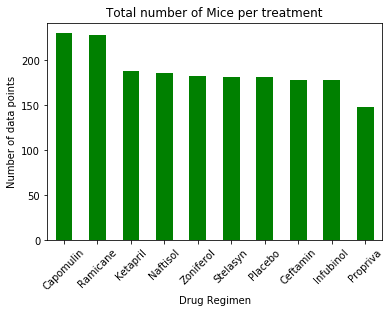

In [149]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_bar_chart=clean_df["Drug Regimen"].value_counts()
total_bar_chart.plot.bar(rot=45,color='green')
plt.title('Total number of Mice per treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of data points')
plt.show()


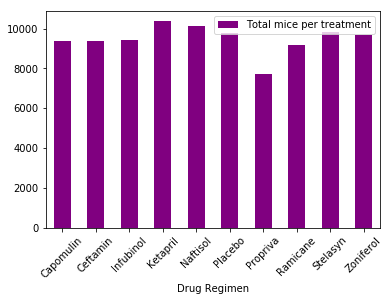

In [150]:
total_mice_bar=pd.DataFrame({"Total mice per treatment":drug_sum})
total_mice_bar_chart=total_mice_bar.plot(kind='bar',color='purple',rot=45)

In [151]:

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
clean_df_index=clean_df['Drug Regimen'].value_counts()
drug_reg=drug_reg_clean_df.index.values
drug_reg

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

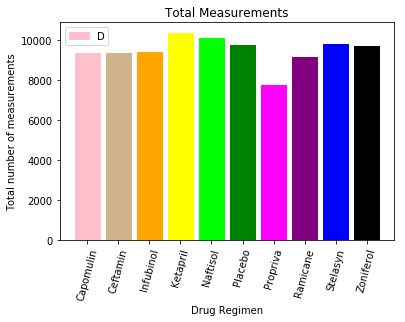

In [152]:
plt.title('Total Measurements')
barlist=plt.bar(drug_reg,drug_sum)
plt.xticks(rotation=75)
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of measurements')
barlist[0].set_color('pink')
barlist[1].set_color('tan')
barlist[2].set_color('Orange')
barlist[3].set_color('yellow')
barlist[4].set_color('lime')
barlist[5].set_color('green')
barlist[6].set_color('Magenta')
barlist[7].set_color('purple')
barlist[8].set_color('blue')
barlist[9].set_color('black')
plt.legend('Drug Regimen')
plt.show()

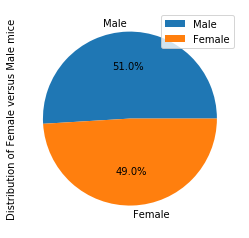

In [153]:

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice=clean_df['Sex'].value_counts()
gender_mice_df=pd.DataFrame({"Distribution of Female versus Male mice":gender_mice})
gender_pie=gender_mice_df.plot(kind='pie',subplots=True,autopct="%1.1f%%")

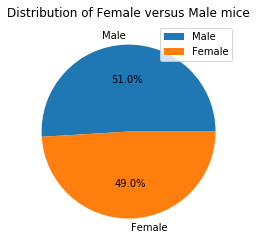

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice,labels=['Male','Female'],autopct="%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.legend()
plt.show()

In [155]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [158]:
clean_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_sort1=clean_df.sort_values(["Drug Regimen"])
final_capomulin_reg=drug_sort1.loc[drug_sort1['Drug Regimen']=="Capomulin"]
final_capomulin_reg_mouse_sort=final_capomulin_reg.sort_values(["Mouse ID"])
final_capomulin_reg_mouse=final_capomulin_reg_mouse_sort.groupby(["Mouse ID"])
final_capomulin_reg_mouse_vol=final_capomulin_reg_mouse["Tumor Volume (mm3)"].unique()
capomulin_list=[]
for vol in final_capomulin_reg_mouse_vol[:]:
    capomulin_list.append(vol[-1])
capomulin_df=pd.DataFrame({'Final Volume':capomulin_list})  
capomulin_df=capomulin_df.sort_values('Final Volume',ascending=True)
final_ramicane_reg=drug_sort1.loc[drug_sort1['Drug Regimen']=='Ramicane']
final_ramicane_reg_mouse_sort=final_ramicane_reg.sort_values(['Mouse ID'])
final_ramicane_reg_mouse=final_ramicane_reg_mouse_sort.groupby(['Mouse ID'])
final_ramicane_reg_mouse_vol=final_ramicane_reg_mouse['Tumor Volume (mm3)'].unique()
ramicane_list=[]
for vol in final_ramicane_reg_mouse_vol[:]:
    ramicane_list.append(vol[-1])
ramicane_df=pd.DataFrame({'Final Volume':ramicane_list})
ramicane_df=ramicane_df.sort_values('Final Volume',ascending=True)
final_infubinol_reg=drug_sort1.loc[drug_sort1['Drug Regimen']=='Infubinol']
final_infubinol_reg_mouse_sort=final_infubinol_reg.sort_values(['Mouse ID'])
final_infubinol_reg_mouse=final_infubinol_reg_mouse_sort.groupby(['Mouse ID'])
final_infubinol_reg_mouse_vol=final_infubinol_reg_mouse['Tumor Volume (mm3)'].unique()
infubinol_list=[]
for vol in final_infubinol_reg_mouse_vol[:]:
    infubinol_list.append(vol[-1])
infubinol_df=pd.DataFrame({'Final Volume':infubinol_list})
infubinol_df=infubinol_df.sort_values('Final Volume',ascending=True)
final_ceftamin_reg=drug_sort1.loc[drug_sort1['Drug Regimen']=='Ceftamin']
final_ceftamin_reg_mouse_sort=final_ceftamin_reg.sort_values(['Mouse ID'])
final_ceftamin_reg_mouse=final_ceftamin_reg_mouse_sort.groupby(['Mouse ID'])
final_ceftamin_reg_mouse_vol=final_ceftamin_reg_mouse['Tumor Volume (mm3)'].unique()
ceftamin_list=[]
for vol in final_ceftamin_reg_mouse_vol[:]:
    ceftamin_list.append(vol[-1])
    
ceftamin_df=pd.DataFrame({'Final Volume':ceftamin_list})
ceftamin_df=ceftamin_df.sort_values('Final Volume',ascending=True)


In [160]:
#Calculate the Quartiles
#Capomulin
capomulin_quartiles=capomulin_df['Final Volume'].quantile([0.25,0.5,0.75])
capomulin_lquartile=capomulin_quartiles[0.25]
capomulin_uquartile=capomulin_quartiles[0.75]
capomulin_iqr=capomulin_uquartile-capomulin_lquartile
capomulin_iqr
capomulin_lbound=capomulin_lquartile-1.5*capomulin_iqr
capomulin_ubound=capomulin_uquartile+1.5*capomulin_iqr
#Ramicane
ramicane_quartiles=ramicane_df['Final Volume'].quantile([0.25,0.5,0.75])
ramicane_lquartile=ramicane_quartiles[0.25]
ramicane_uquartile=ramicane_quartiles[0.75]
ramicane_iqr=ramicane_uquartile-ramicane_lquartile
ramicane_iqr
ramicane_lbound=ramicane_lquartile-1.5*ramicane_iqr
ramicane_ubound=ramicane_uquartile+1.5*ramicane_iqr
#Infubinol
infubinol_quartiles=infubinol_df['Final Volume'].quantile([0.25,0.5,0.75])
infubinol_lquartile=infubinol_quartiles[0.25]
infubinol_uquartile=infubinol_quartiles[0.75]
infubinol_iqr=infubinol_uquartile-infubinol_lquartile
infubinol_iqr
infubinol_lbound=infubinol_lquartile-1.5*infubinol_iqr
infubinol_ubound=infubinol_uquartile+1.5*infubinol_iqr
#Ceftamin
ceftamin_quartiles=ceftamin_df['Final Volume'].quantile([0.25,0.5,0.75])
ceftamin_lquartile=ceftamin_quartiles[0.25]
ceftamin_uquartile=ceftamin_quartiles[0.75]
ceftamin_iqr=ceftamin_uquartile-ceftamin_lquartile
ceftamin_iqr
ceftamin_lbound=ceftamin_lquartile-1.5*ceftamin_iqr
ceftamin_ubound=ceftamin_uquartile+1.5*ceftamin_iqr
#Create a Quartile DataFrame
quartile_df=pd.DataFrame({'Lower Quartile':[capomulin_lquartile,ramicane_lquartile,infubinol_lquartile,ceftamin_lquartile],
                         'Upper Quartile':[capomulin_uquartile,ramicane_uquartile,infubinol_uquartile,ceftamin_uquartile],
                         'IQR':[capomulin_iqr,ramicane_iqr,infubinol_iqr,ceftamin_iqr],
                         'Lower bound':[capomulin_lbound,ramicane_lbound,infubinol_lbound,ceftamin_lbound],
                         'Upper bound':[capomulin_ubound,ramicane_ubound,infubinol_ubound,ceftamin_ubound]},
                        index=['Capomulin','Ramicane','Infubinol','Ceftamin'])
print(f"The final volume values for Capomulin trials are {capomulin_df}.")
print(f"The final volume values for Ramicane trials are {ramicane_df}.")
print(f"The final volume values for Infubinol trials are {infubinol_df}.")
print(f"The final volume values for Ceftamin trials are {ceftamin_df}.")
print("")
print("Potential Outliers")
print("Capomulin:N/A")
print("Ramicane:N/A")
print("Infubinol:[36.321346]")
print("Ceftamin:N/A")
quartile_df

The final volume values for Capomulin trials are     Final Volume
11     33.118756
18     33.949341
19     35.459490
2      35.624403
23     36.065835
10     38.343902
1      39.167949
21     39.952347
20     40.156413
4      40.159220
24     41.019913
3      42.172301
5      42.261665
7      43.013681
6      43.421014
17     43.571703
22     45.000000
14     45.000000
16     45.000000
12     45.622381
0      45.651331
15     45.737145
8      46.408361
13     46.539206
9      48.070452.
The final volume values for Ramicane trials are     Final Volume
2      36.558581
15     36.940274
14     37.969934
0      38.087373
10     38.248817
20     38.711872
13     38.825898
9      40.330935
18     40.772803
12     41.635344
6      41.746355
24     42.188787
16     42.575707
1      43.047543
22     43.166373
11     44.014900
5      44.118270
4      44.454378
23     45.000000
17     45.000000
3      45.000000
19     45.000000
8      45.000000
7      45.350232
21     46.105363.
The final volume 

,Lower Quartile,Upper Quartile,IQR,Lower bound,Upper bound
Capomulin,39.167949,45.000000,5.832051,30.419874,53.748076
Ramicane,38.825898,45.000000,6.174102,29.564745,54.261153
Infubinol,47.222446,55.650681,8.428235,34.580093,68.293034
Ceftamin,45.000000,56.767158,11.767158,27.349263,74.417896


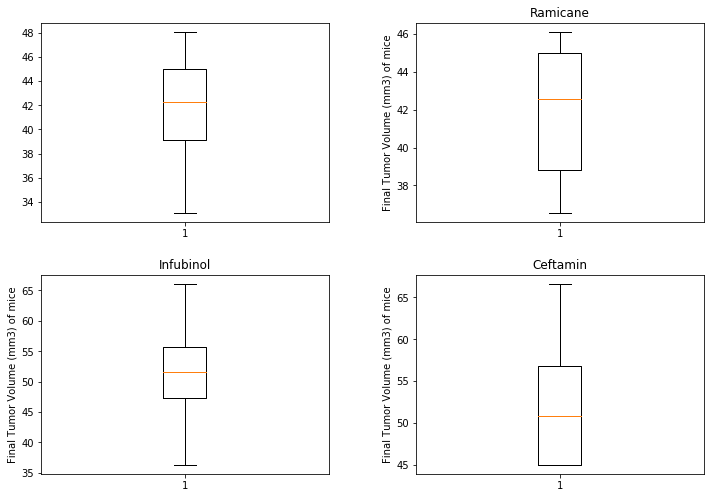

In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Create the Figure and Axis Variables
#Found method to Create Figure with Multiple Subplots at https://kite.com/python/answers/how-to-create-multiple-subplots-in-matplotlib-in-python
fig1,ax1=plt.subplots(nrows=2,ncols=2)

ax1[0,0].set_ylabel=('Final Tumor Volume (mm3) of mice')
ax1[0,0].set_title=('Capomulin')
ax1[0,0].boxplot(capomulin_df['Final Volume'])

ax1[0,1].set_ylabel('Final Tumor Volume (mm3) of mice')
ax1[0,1].set_title('Ramicane')
ax1[0,1].boxplot(ramicane_df['Final Volume'])

ax1[1,0].set_ylabel('Final Tumor Volume (mm3) of mice')
ax1[1,0].set_title('Infubinol')
ax1[1,0].boxplot(infubinol_df['Final Volume']) 

ax1[1,1].set_ylabel('Final Tumor Volume (mm3) of mice')
ax1[1,1].set_title('Ceftamin')
ax1[1,1].boxplot(ceftamin_df['Final Volume']) 

fig1.set_size_inches(10,7)
fig1.tight_layout(pad=1.0,h_pad=2.0,w_pad=5.0)
plt.show()



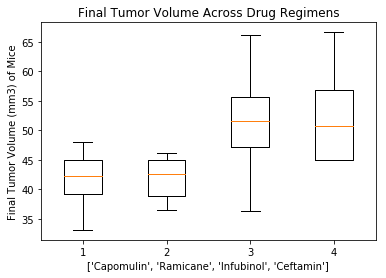

In [251]:
fig1,ax1=plt.subplots()
c='cyan'
ax1.boxplot([capomulin_df['Final Volume'],ramicane_df['Final Volume'],infubinol_df['Final Volume'],ceftamin_df['Final Volume']])
ax1.set_title('Final Tumor Volume Across Drug Regimens')
ax1.set_xlabel(['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax1.set_ylabel('Final Tumor Volume (mm3) of Mice')
plt.show()

In [190]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


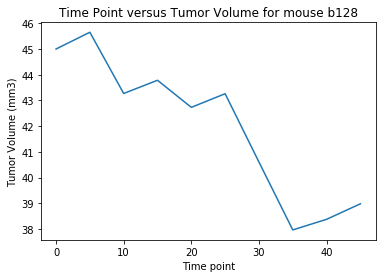

In [200]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128_df=final_capomulin_reg_mouse_sort.loc[final_capomulin_reg_mouse_sort['Mouse ID']=='b128']
b128_df=b128_df.sort_values(['Timepoint'])
b128_df

b128_line=plt.plot(b128_df['Timepoint'],b128_df['Tumor Volume (mm3)'])
plt.title('Time Point versus Tumor Volume for mouse b128')
plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [209]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_capomulin_mouse_vol=final_capomulin_reg_mouse['Tumor Volume (mm3)'].mean()
avg_capomulin_mouse_vol

capomulin_mouse_wt=final_capomulin_reg_mouse['Weight (g)'].unique().astype(int)
capomulin_vol_wt_df=pd.DataFrame({'Avg Tumor Volume (mm3)': avg_capomulin_mouse_vol,'Weight (g)': capomulin_mouse_wt})

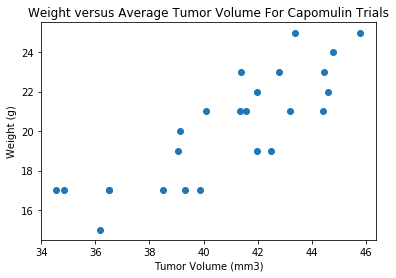

In [213]:
scatter=plt.scatter(capomulin_vol_wt_df['Avg Tumor Volume (mm3)'],capomulin_vol_wt_df['Weight (g)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Weight versus Average Tumor Volume For Capomulin Trials')
plt.show()

In [224]:

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

## Correlation Coefficient:-
correlation=sts.pearsonr(capomulin_vol_wt_df['Avg Tumor Volume (mm3)'],capomulin_vol_wt_df['Weight (g)'])
print(f"The correlation coefficient for mouse weight and average tumor volume in the Capomulin study is:{round(correlation[0],2)}.") 

The correlation coefficient for mouse weight and average tumor volume in the Capomulin study is:0.84.


In [238]:
## Linear regression model:-
x_values=(capomulin_vol_wt_df['Avg Tumor Volume (mm3)'])
y_values=(capomulin_vol_wt_df['Weight (g)'])
slope,intercept,rvalue,pvalue,stderr=sts.linregress(x_values,y_values)
regress_values=x_values * slope + intercept
lin_eq="y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f" The  r-squared is :{rvalue}")

 The  r-squared is :0.8419363424694721


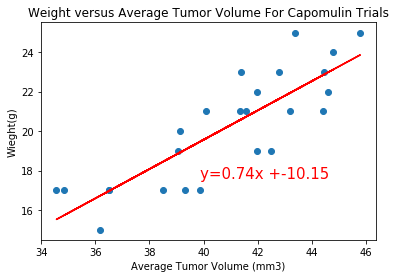

<Figure size 432x288 with 0 Axes>

In [247]:
## Scatterplot with Line equation:-

scatter= plt.scatter(capomulin_vol_wt_df['Avg Tumor Volume (mm3)'],capomulin_vol_wt_df['Weight (g)'])
plt.title("Weight versus Average Tumor Volume For Capomulin Trials")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Wieght(g)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(lin_eq,(10,10),xycoords='figure points',xytext=(200,100),fontsize=15,color='red')
plt.show()
plt.tight_layout()